<a href="https://colab.research.google.com/github/samuelhenrick1/Arduino/blob/main/AN%C3%81LISE_ESTAT%C3%8DSTICA_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema 1

Neste exercício vamos fazer uma análise de regressão multivariada com a mesma base de dados autos.csv para tentar prever o preço de carro a partir das seguintes variáveis: potência (horsepower), comprimento (length), tamanho do motor (engine.size), consumo na cidade (city.mpg).

Utilizando então a base disponibilizada, você deve:

In [39]:
install.packages('readr')
install.packages('GGally')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
library(readr)
library(GGally)

In [41]:
autos = read.csv2('https://raw.githubusercontent.com/samuelhenrick1/Arduino/main/autos.csv')

In [42]:
head(autos)

,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [43]:
str(autos)

'data.frame':	193 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.cylinders    : int  4 4 6 4 5 5 5 5 5 4 ...
 $ engine.size      : int  130 130 152 109 136 136 136 136 131

a)    Ajustar um modelo de regressão linear sendo price a variável alvo (resposta), como função das demais variáveis citadas acima: horsepower, length, engine.size, city.mpg.

In [44]:
modelo = lm(price ~ horsepower + length + engine.size + city.mpg - 1, data = autos)
modelo


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg - 
    1, data = autos)

Coefficients:
 horsepower       length  engine.size     city.mpg  
     17.469       -2.796      134.546     -206.826  


b)    Realizar a análise do modelo ajustado, avaliando o valor do R-quadrado, a significância estatística de cada parâmetro ajustado e a qualidade total do ajuste pela estatística F.

In [45]:
summary(modelo)


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg - 
    1, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9485.0 -1916.4   -68.6  1703.5 13866.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
horsepower    17.469     14.637   1.193    0.234    
length        -2.796     14.072  -0.199    0.843    
engine.size  134.546     12.467  10.792  < 2e-16 ***
city.mpg    -206.826     50.942  -4.060 7.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3636 on 189 degrees of freedom
Multiple R-squared:  0.9464,	Adjusted R-squared:  0.9453 
F-statistic: 834.5 on 4 and 189 DF,  p-value: < 2.2e-16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



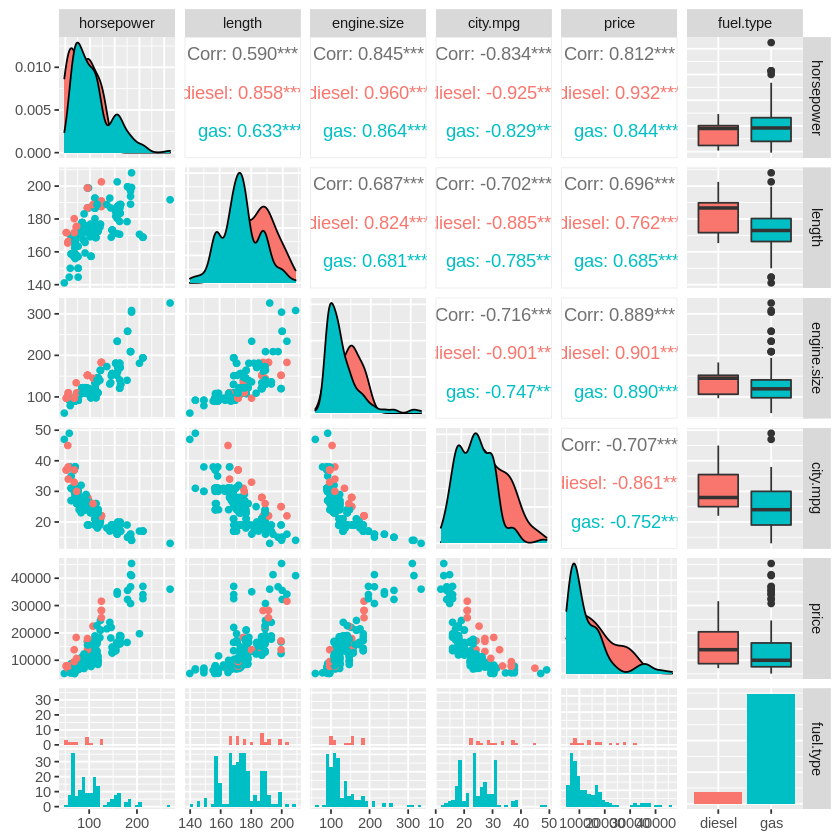

In [46]:
ggpairs(autos, columns = c("horsepower", "length", "engine.size", "city.mpg", "price", "fuel.type"), mapping = ggplot2::aes_string(color = "fuel.type"))

In [47]:
modelo1 = update(modelo, . ~ . - horsepower)

In [48]:
summary(modelo1)


Call:
lm(formula = price ~ length + engine.size + city.mpg - 1, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9414.8 -1965.7   -36.1  1674.0 14080.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
length         4.828     12.553   0.385    0.701    
engine.size  143.842      9.745  14.761  < 2e-16 ***
city.mpg    -235.230     45.091  -5.217 4.74e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3640 on 190 degrees of freedom
Multiple R-squared:  0.946,	Adjusted R-squared:  0.9452 
F-statistic:  1110 on 3 and 190 DF,  p-value: < 2.2e-16


c)    Realizar a verificação de aderência do modelo às premissas estatísticas do método dos mínimos quadrados através dos gráficos diagnósticos, comentando o gráfico dos resíduos x valores ajustados e o gráfico da curva Normal-QQ.

In [49]:
par(mfrow = c(2, 2))

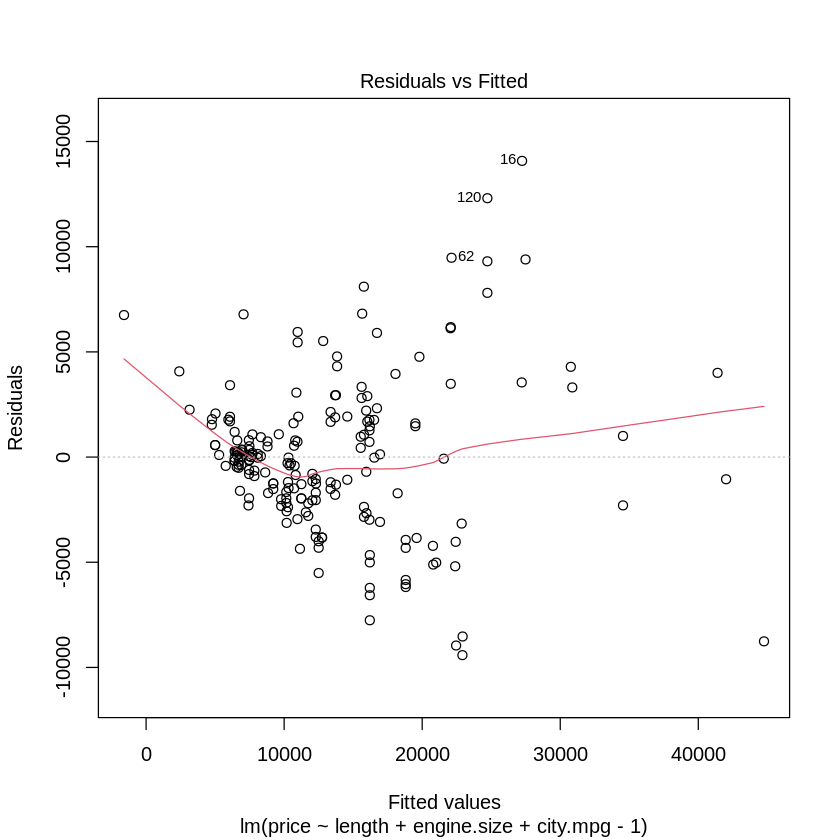

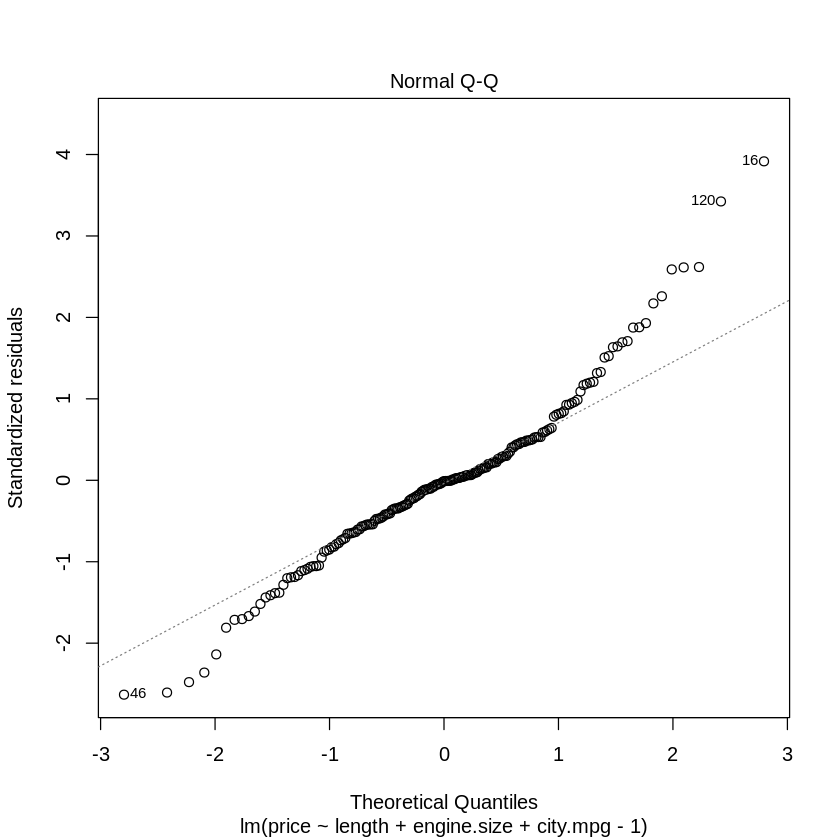

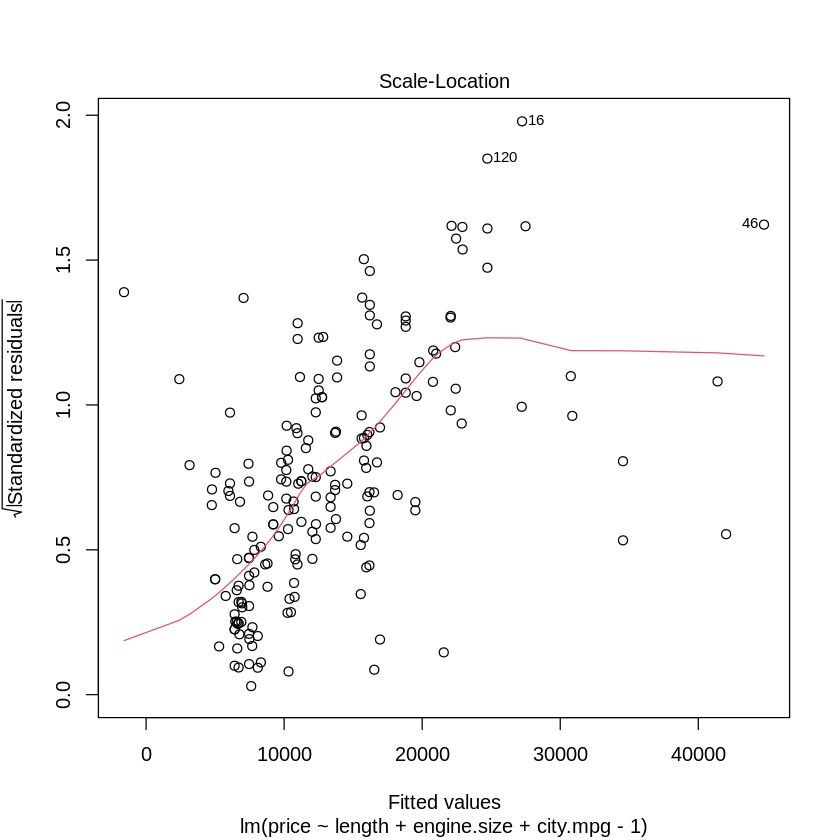

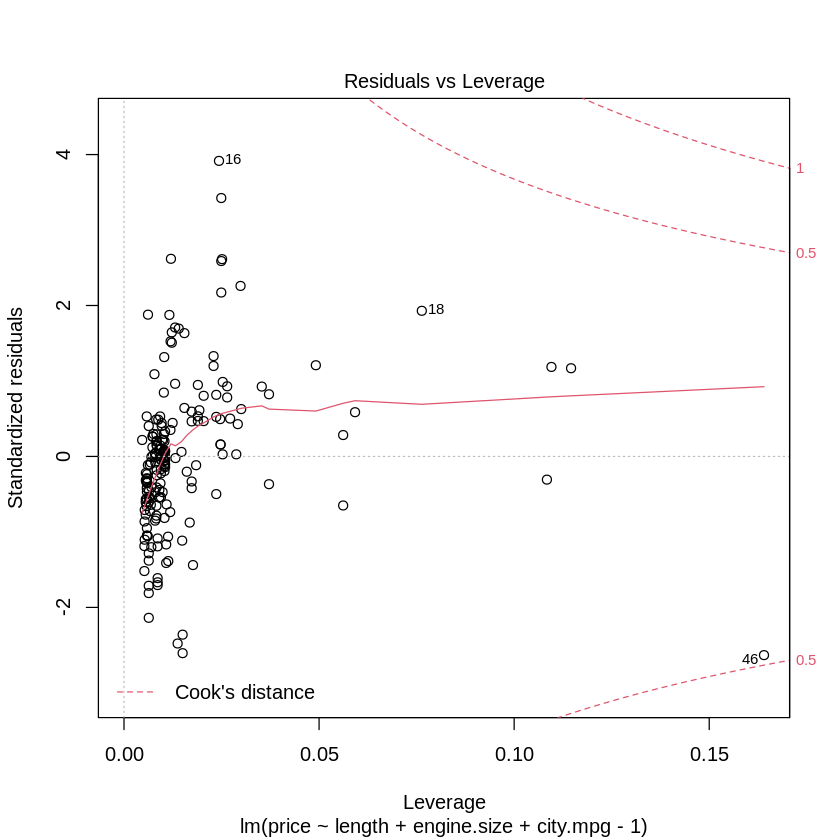

In [50]:
plot(modelo1)

d)    Fazer uma análise dos resultados do ajuste, discorrendo sobre o impacto de cada preditora, significativa do ponto de vista estatístico, no preço do carro.

In [51]:
# Pela análise feita em video-aula, entendo que as variaveis auto explicativas são length, engine.size e city.mpg explicam mais de 90% de price

# 1. Explorar as variaveis explicativas;

In [52]:
y_preco = autos$price
x_length = autos$length
x_engine = autos$engine.size
x_city = autos$city.mpg

In [53]:
summary(y_preco)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5118    7738   10245   13285   16515   45400 

In [54]:
summary(x_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  141.1   166.3   173.2   174.3   184.6   208.1 

In [55]:
summary(x_engine)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0    98.0   120.0   128.1   146.0   326.0 

In [56]:
summary(x_city)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   19.00   25.00   25.33   30.00   49.00 

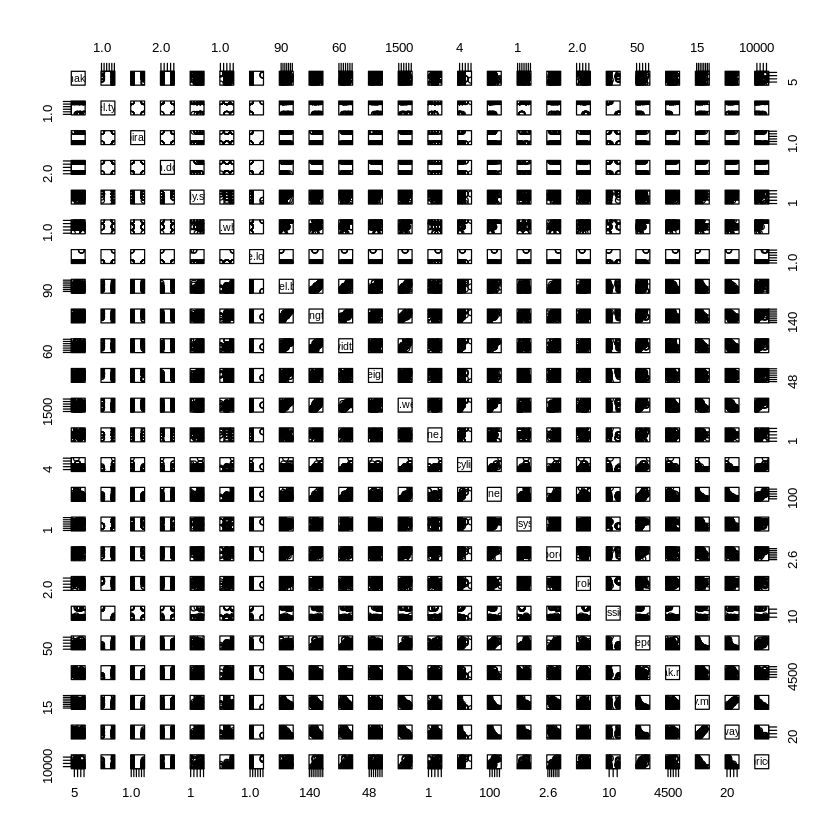

In [57]:
par(mfrow=c(2,2))
plot(autos)


In [58]:
# 2A. Buscar correçaões nas variáveis;

In [59]:
cor.test(autos$price, autos$length)


	Pearson's product-moment correlation

data:  autos$price and autos$length
t = 13.393, df = 191, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6151530 0.7622448
sample estimates:
      cor 
0.6959279 


In [60]:
cor.test(autos$price, autos$engine.size)


	Pearson's product-moment correlation

data:  autos$price and autos$engine.size
t = 26.799, df = 191, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8548485 0.9151400
sample estimates:
      cor 
0.8887785 


In [61]:
cor.test(autos$price, autos$city.mpg)


	Pearson's product-moment correlation

data:  autos$price and autos$city.mpg
t = -13.801, df = 191, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7709183 -0.6280600
sample estimates:
      cor 
-0.706618 


In [62]:
# 2A. Buscar e multicolinearidade nas variáveis;

In [63]:
modelo_simples1 = lm(autos$price ~ autos$length)
summary(modelo_simples1)


Call:
lm(formula = autos$price ~ autos$length)

Residuals:
   Min     1Q Median     3Q    Max 
-11931  -3474  -1426   1999  26191 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -65358.17    5886.76  -11.10   <2e-16 ***
autos$length    451.13      33.68   13.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5824 on 191 degrees of freedom
Multiple R-squared:  0.4843,	Adjusted R-squared:  0.4816 
F-statistic: 179.4 on 1 and 191 DF,  p-value: < 2.2e-16


In [64]:
modelo_simples2 = lm(autos$price ~ autos$engine.size)
summary(modelo_simples2)


Call:
lm(formula = autos$price ~ autos$engine.size)

Residuals:
   Min     1Q Median     3Q    Max 
-11490  -2031   -193   1460  14050 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8862.79     868.66   -10.2   <2e-16 ***
autos$engine.size   172.86       6.45    26.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3717 on 191 degrees of freedom
Multiple R-squared:  0.7899,	Adjusted R-squared:  0.7888 
F-statistic: 718.2 on 1 and 191 DF,  p-value: < 2.2e-16


In [65]:
modelo_simples3 = lm(autos$price ~ autos$city.mpg)
summary(modelo_simples3)


Call:
lm(formula = autos$price ~ autos$city.mpg)

Residuals:
   Min     1Q Median     3Q    Max 
 -7687  -3292  -1747   1595  21980 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    35947.36    1693.22   21.23   <2e-16 ***
autos$city.mpg  -894.81      64.84  -13.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5739 on 191 degrees of freedom
Multiple R-squared:  0.4993,	Adjusted R-squared:  0.4967 
F-statistic: 190.5 on 1 and 191 DF,  p-value: < 2.2e-16


In [66]:
modelo_t = c(modelo_simples1, modelo_simples2, modelo_simples3)

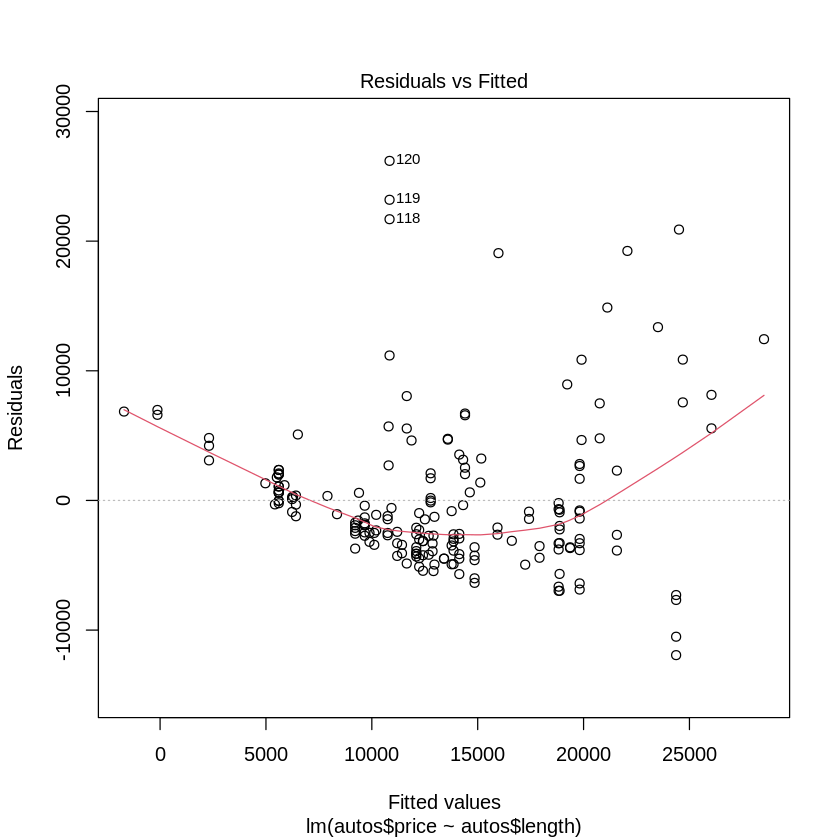

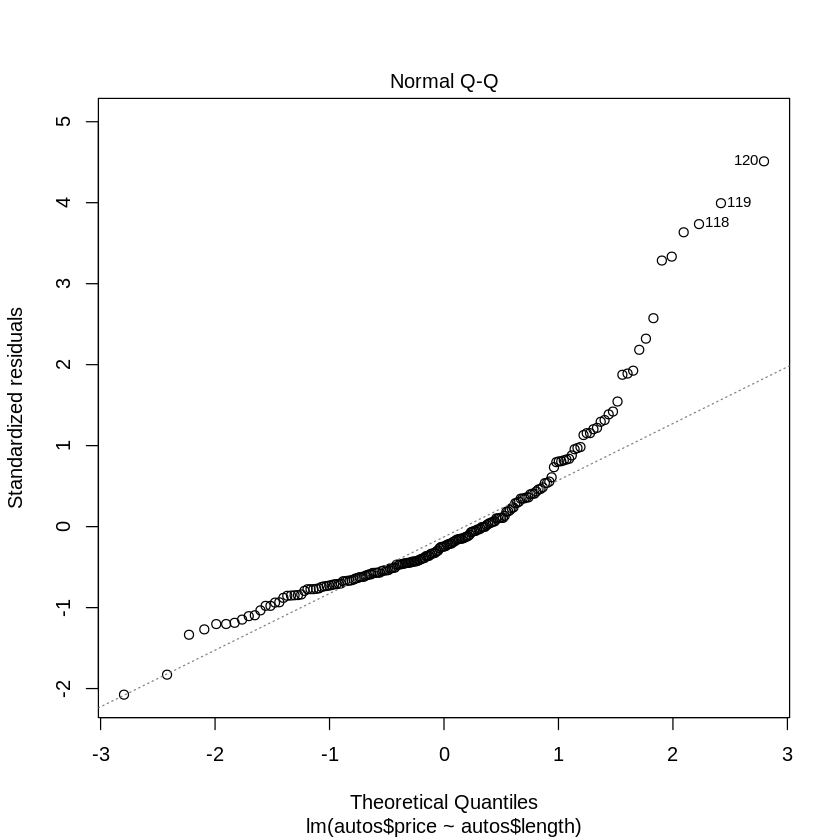

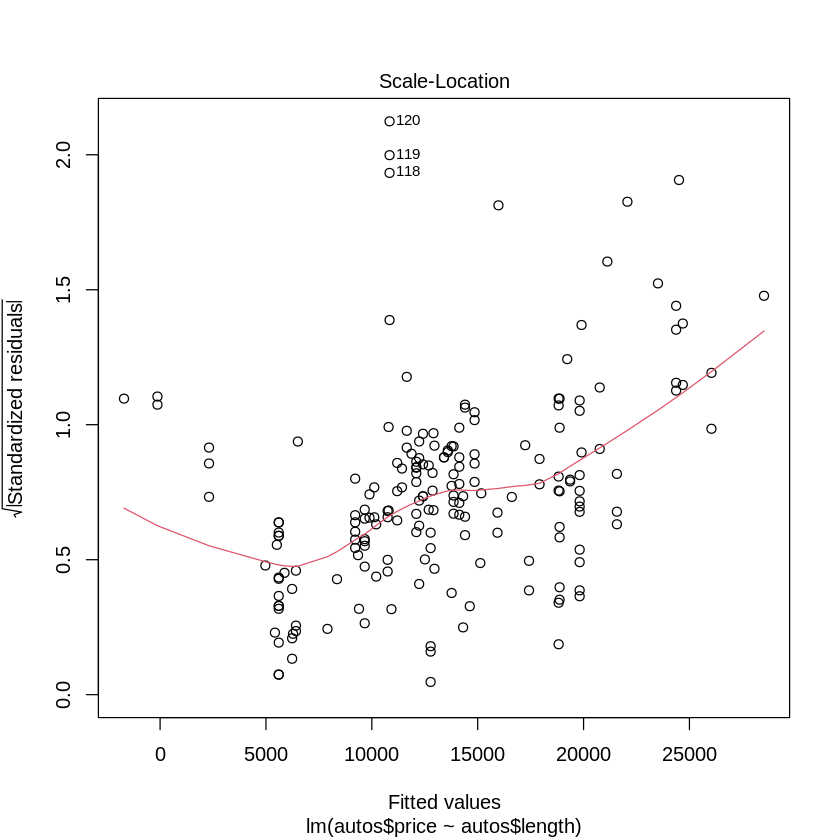

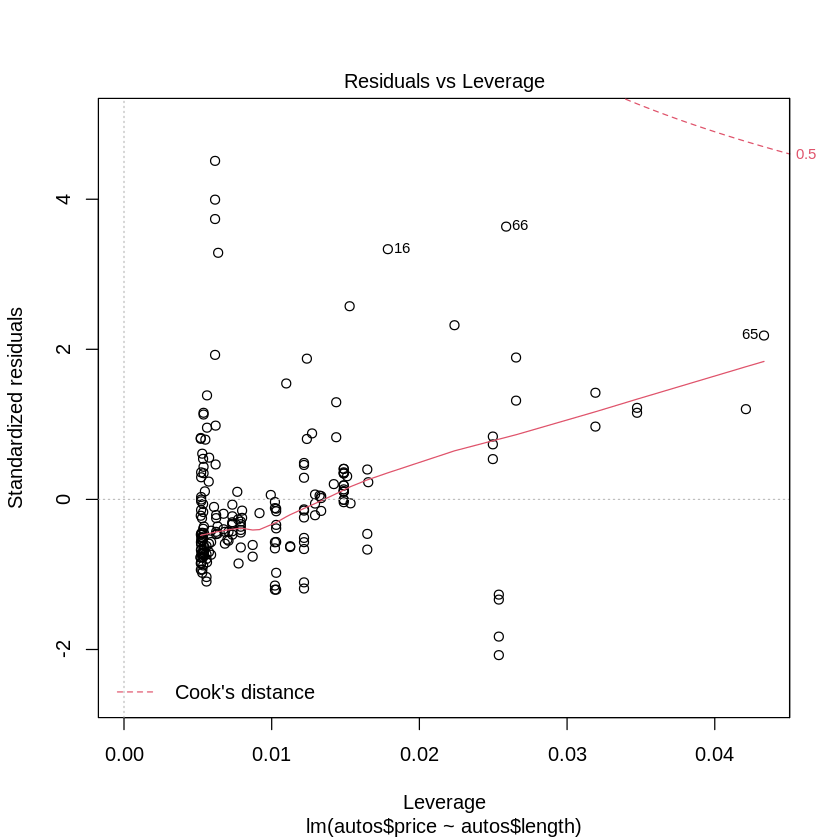

In [67]:
plot(modelo_simples1)

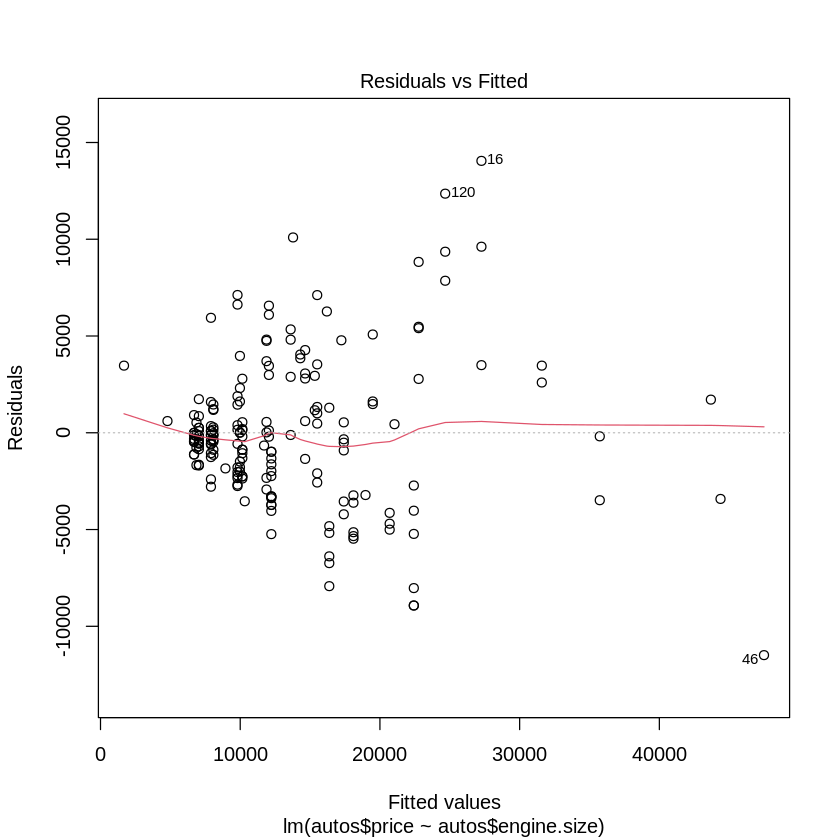

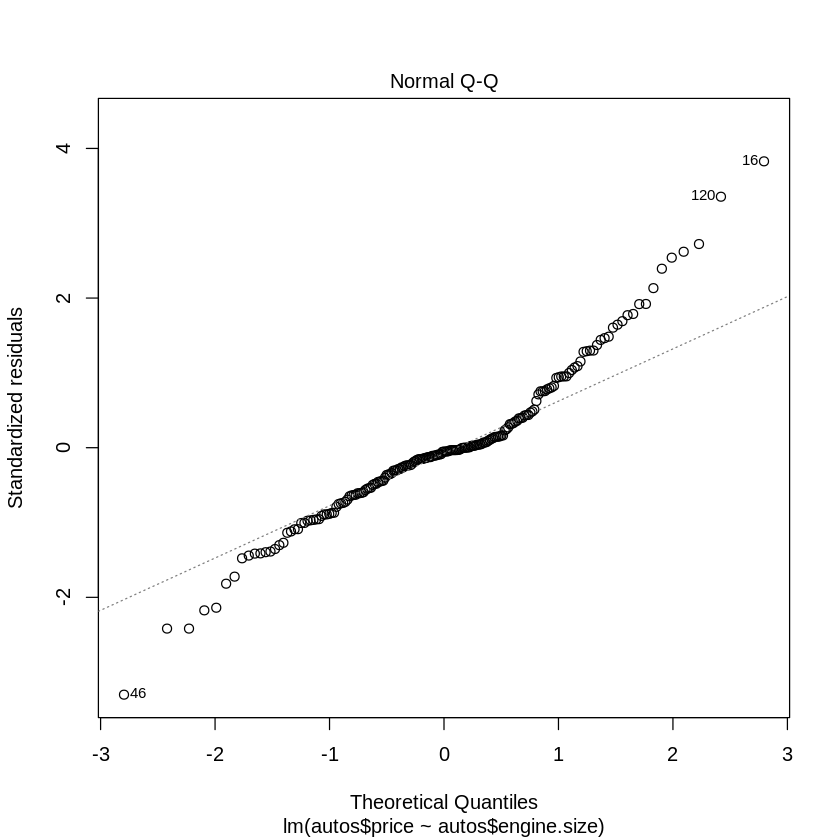

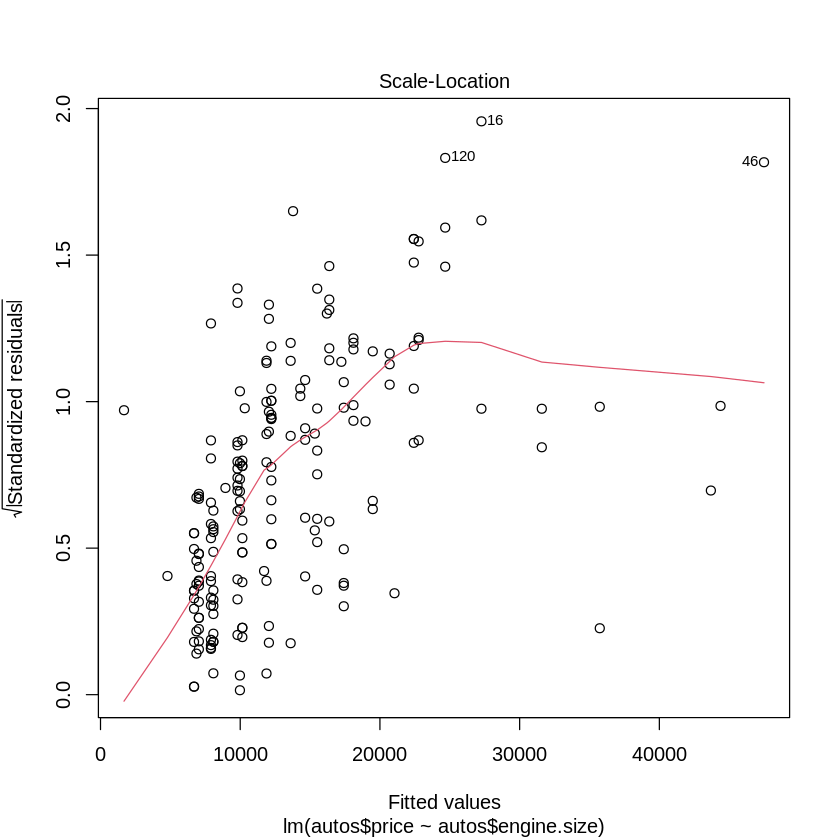

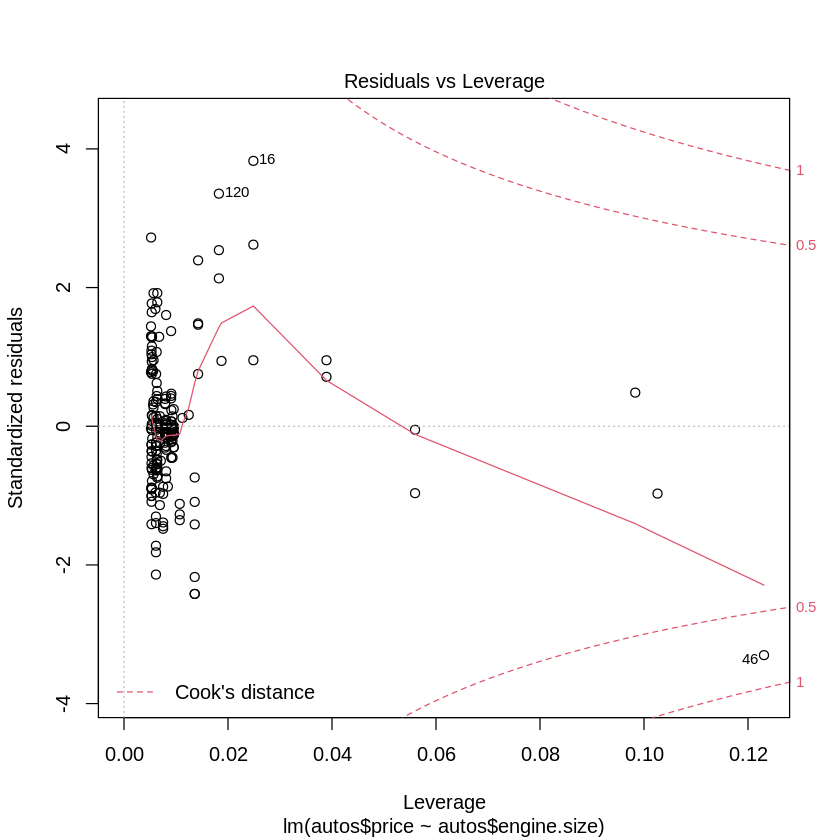

In [68]:
plot(modelo_simples2)

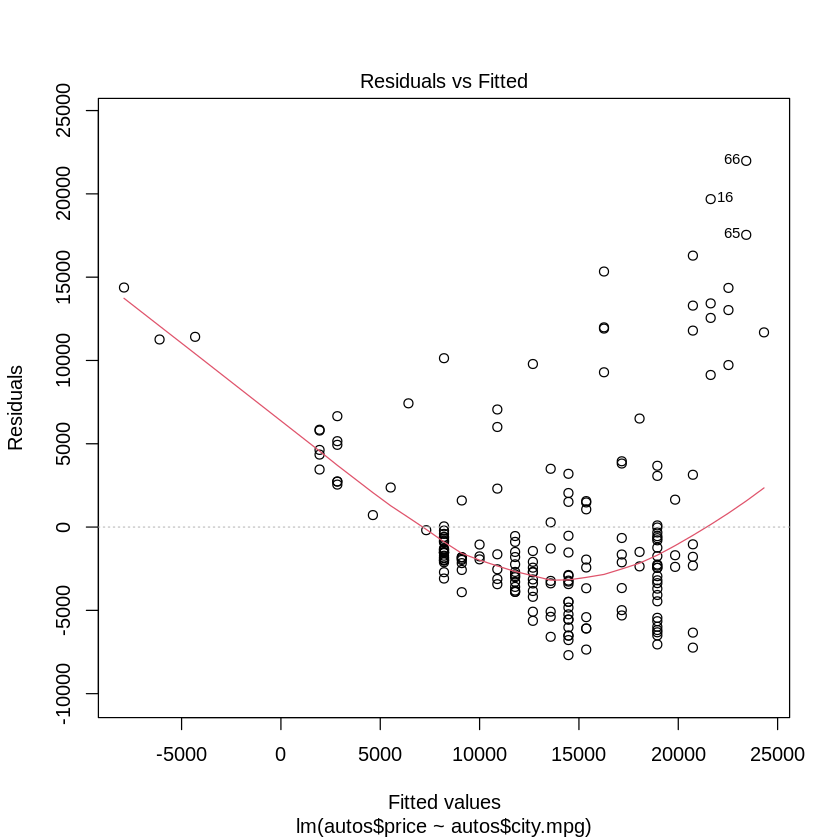

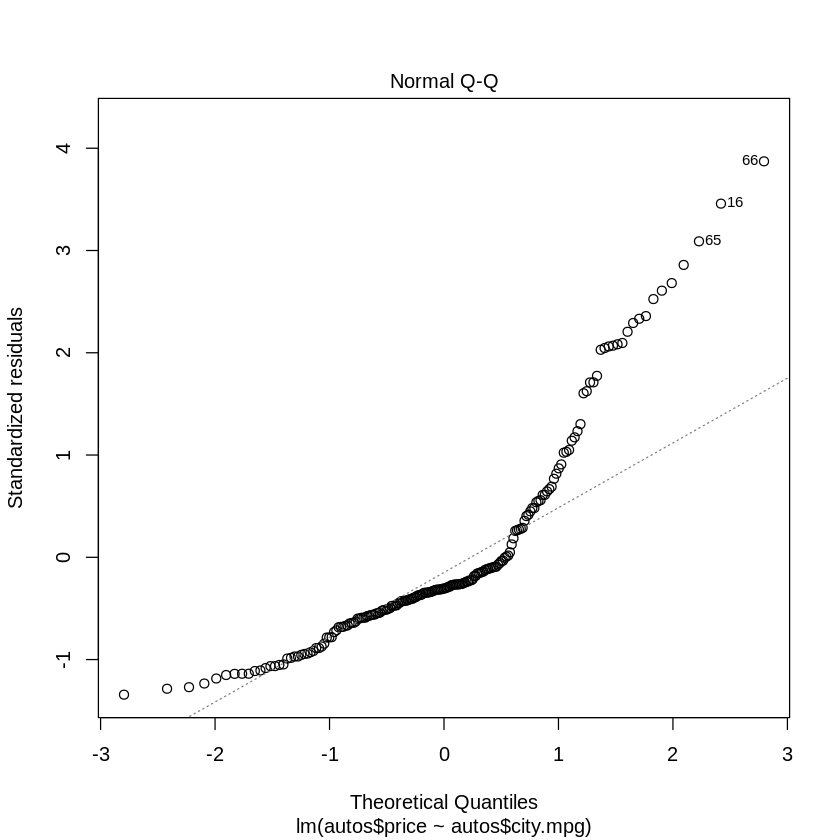

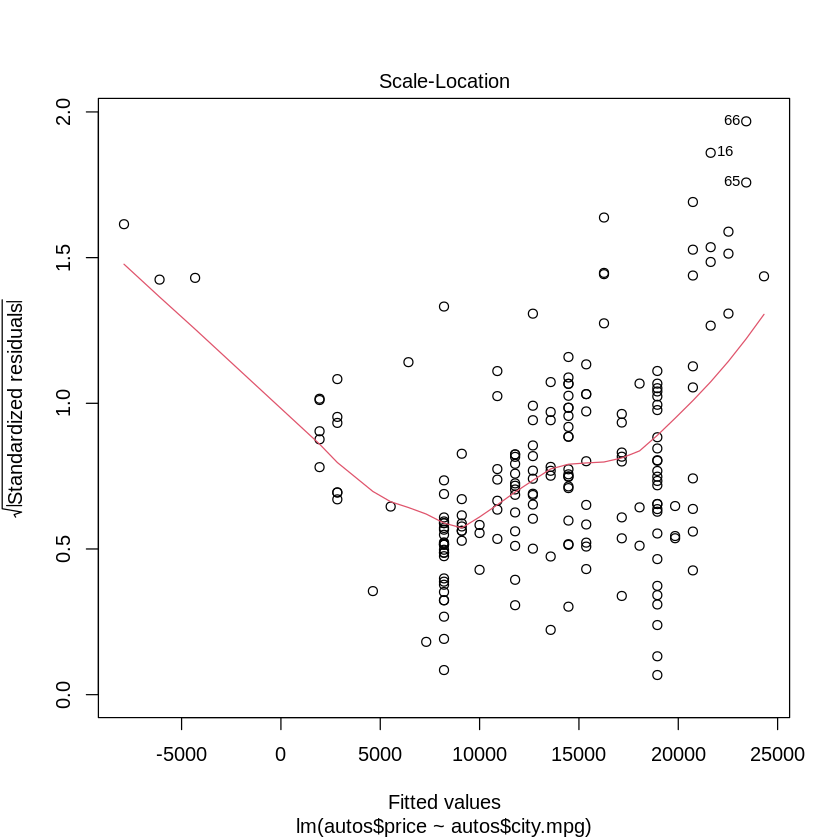

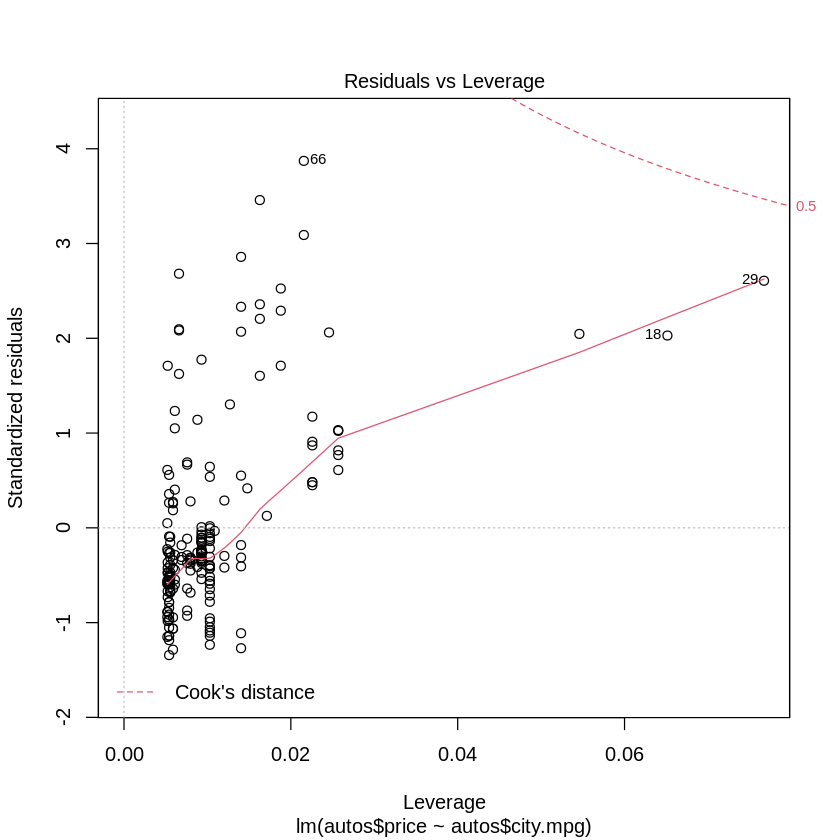

In [69]:
plot(modelo_simples3)

In [70]:
# 3. Criar novas variaveis a partir das já existentes
#Teste de Breusch-Pagan e Goldfeld-Quandt

In [71]:
install.packages('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [72]:
lmtest::bptest(modelo_simples1)


	studentized Breusch-Pagan test

data:  modelo_simples1
BP = 7.8219, df = 1, p-value = 0.005162


In [73]:
lmtest::bptest(modelo_simples2)


	studentized Breusch-Pagan test

data:  modelo_simples2
BP = 46.441, df = 1, p-value = 9.444e-12


In [74]:
lmtest::bptest(modelo_simples3)


	studentized Breusch-Pagan test

data:  modelo_simples3
BP = 11.765, df = 1, p-value = 0.0006034


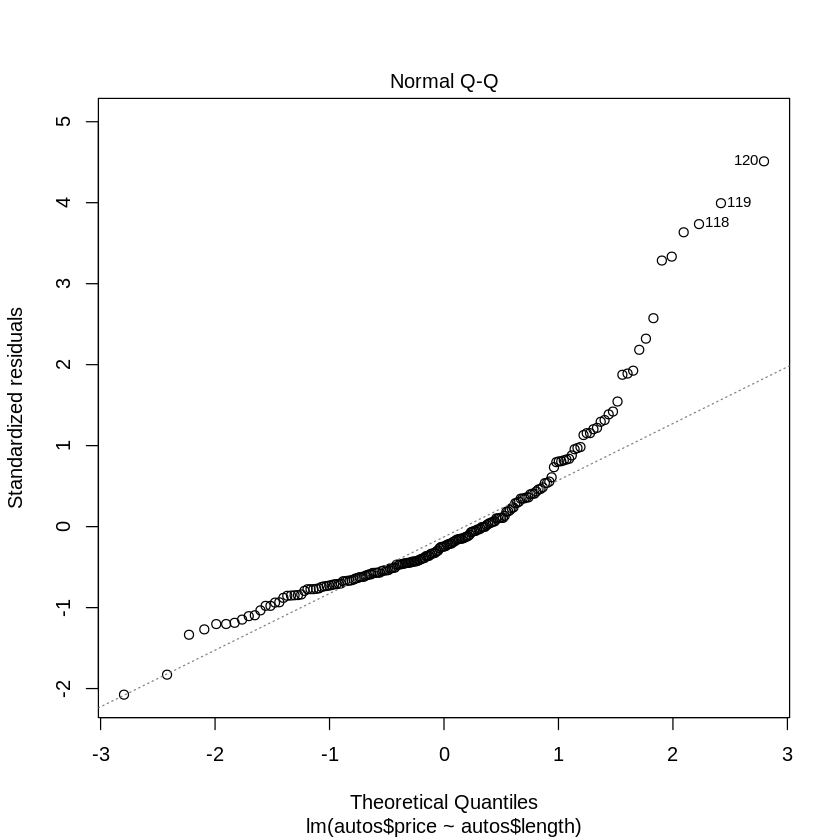

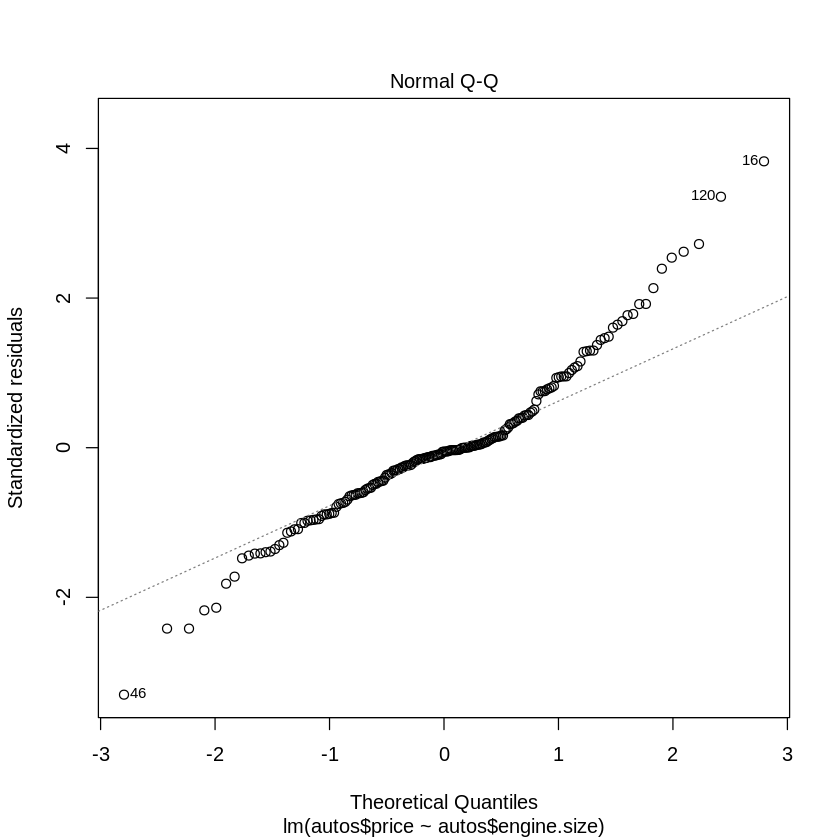

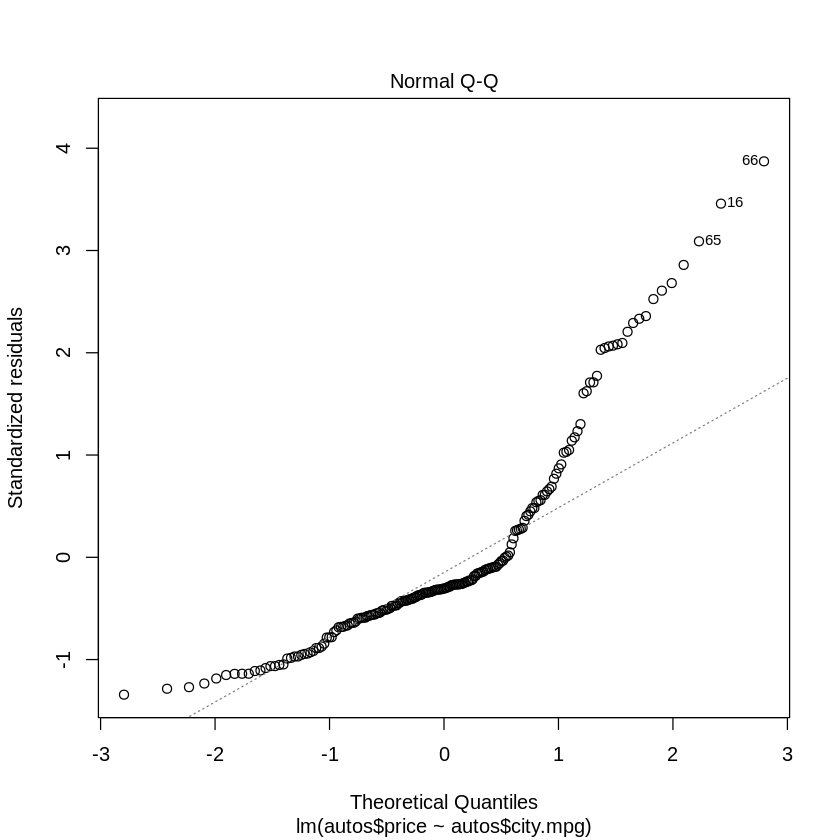

In [75]:
#Comparativo
plot(modelo_simples1, 2)
plot(modelo_simples2, 2)
plot(modelo_simples3, 2)  #O ideal é que os pontos estejam próximos da linha tracejada.


In [76]:
#Teste de Shapiro-Wilk

In [77]:
shapiro.test(modelo_simples1$residuals)


	Shapiro-Wilk normality test

data:  modelo_simples1$residuals
W = 0.83429, p-value = 1.483e-13


In [78]:
shapiro.test(modelo_simples2$residuals)


	Shapiro-Wilk normality test

data:  modelo_simples2$residuals
W = 0.9576, p-value = 1.555e-05


In [79]:
shapiro.test(modelo_simples3$residuals)


	Shapiro-Wilk normality test

data:  modelo_simples3$residuals
W = 0.84016, p-value = 2.736e-13


In [80]:
install.packages('gvlma')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [81]:
library(gvlma)

In [82]:
summary(gvlma(modelo_simples1))


Call:
lm(formula = autos$price ~ autos$length)

Residuals:
   Min     1Q Median     3Q    Max 
-11931  -3474  -1426   1999  26191 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -65358.17    5886.76  -11.10   <2e-16 ***
autos$length    451.13      33.68   13.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5824 on 191 degrees of freedom
Multiple R-squared:  0.4843,	Adjusted R-squared:  0.4816 
F-statistic: 179.4 on 1 and 191 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = modelo_simples1) 

                     Value   p-value                   Decision
Global Stat        324.400 0.000e+00 Assumptions NOT satisfied!
Skewness           116.050 0.000e+00 Assumptions NOT satisfied!
Kurtosis           186.363 0.000e+00 Assumptions NOT satisfied!
Link Function       18.038 2.165e-

In [83]:
summary(gvlma(modelo_simples2))


Call:
lm(formula = autos$price ~ autos$engine.size)

Residuals:
   Min     1Q Median     3Q    Max 
-11490  -2031   -193   1460  14050 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8862.79     868.66   -10.2   <2e-16 ***
autos$engine.size   172.86       6.45    26.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3717 on 191 degrees of freedom
Multiple R-squared:  0.7899,	Adjusted R-squared:  0.7888 
F-statistic: 718.2 on 1 and 191 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = modelo_simples2) 

                    Value   p-value                   Decision
Global Stat        40.015 4.298e-08 Assumptions NOT satisfied!
Skewness           10.210 1.397e-03 Assumptions NOT satisfied!
Kurtosis           24.883 6.093e-07 Assumptions NOT satisfied!
Link Function       2

In [84]:
summary(gvlma(modelo_simples3))


Call:
lm(formula = autos$price ~ autos$city.mpg)

Residuals:
   Min     1Q Median     3Q    Max 
 -7687  -3292  -1747   1595  21980 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    35947.36    1693.22   21.23   <2e-16 ***
autos$city.mpg  -894.81      64.84  -13.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5739 on 191 degrees of freedom
Multiple R-squared:  0.4993,	Adjusted R-squared:  0.4967 
F-statistic: 190.5 on 1 and 191 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = modelo_simples3) 

                    Value   p-value                   Decision
Global Stat        182.90 0.000e+00 Assumptions NOT satisfied!
Skewness            74.82 0.000e+00 Assumptions NOT satisfied!
Kurtosis            32.32 1.308e-08 Assumptions NOT satisfied!
Link Function       62.36 2.887e-

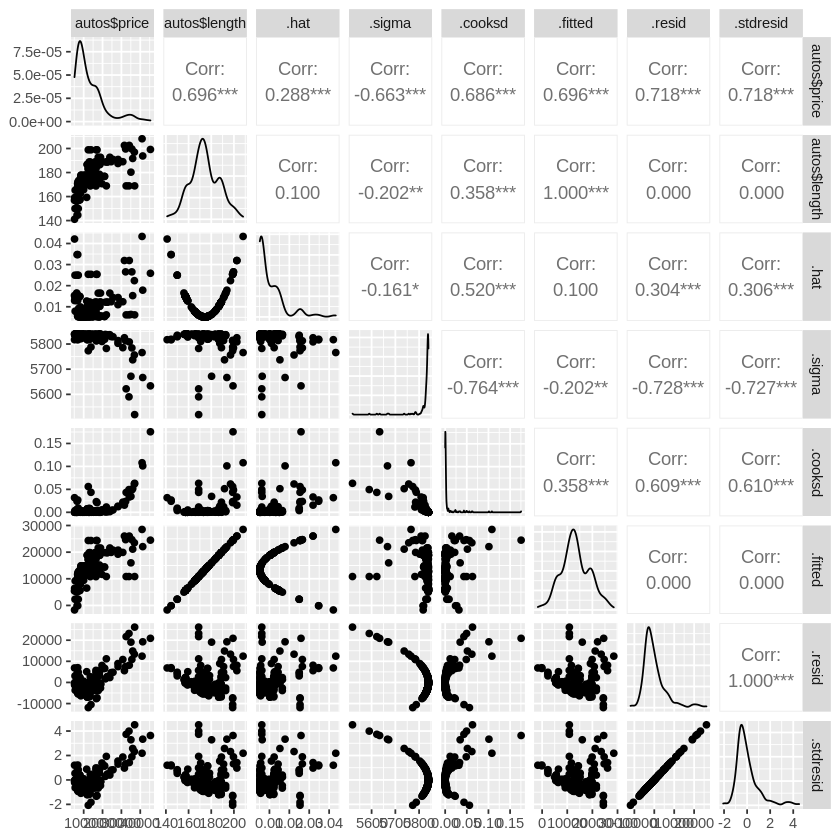

In [85]:
ggpairs(modelo_simples1)

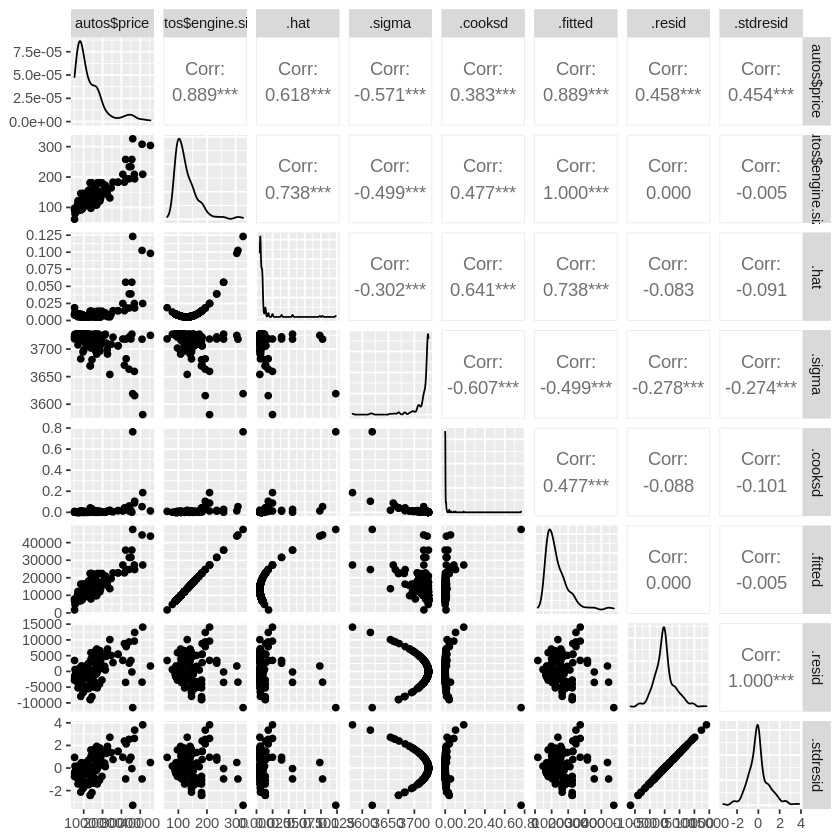

In [86]:
ggpairs(modelo_simples2)

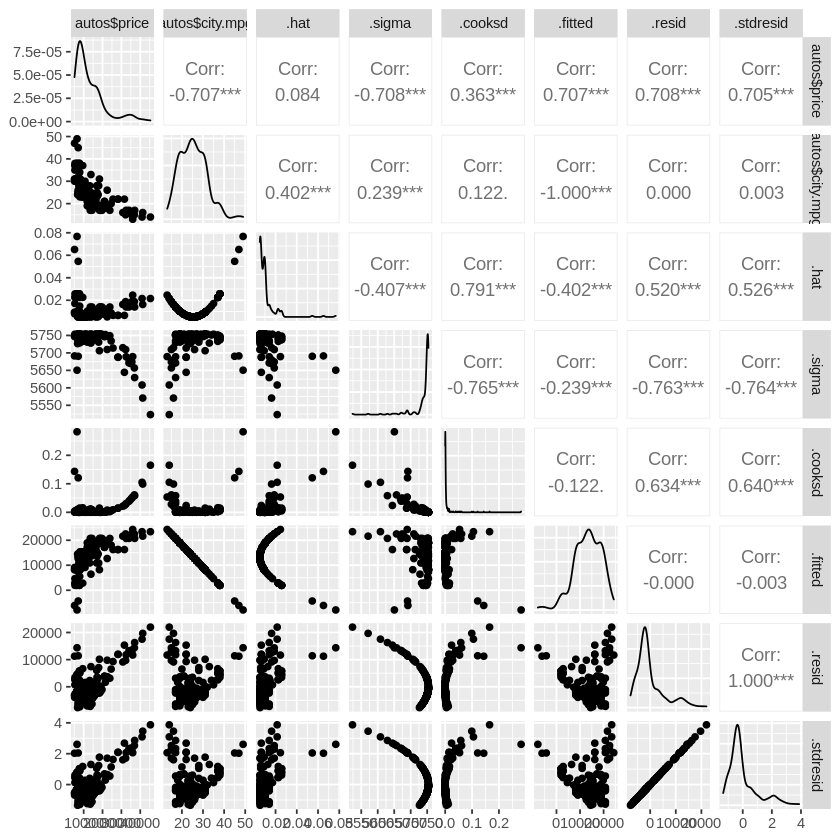

In [87]:
ggpairs(modelo_simples3)